In [14]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import time
np.log(1.0/3)

-1.2039728043259361

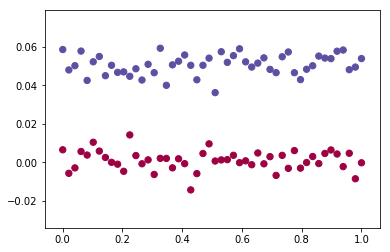

In [2]:
N = 50 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.random.randn(N)*0.005
    X[ix] = np.c_[r, t+j*0.05]
    y[ix] = j
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

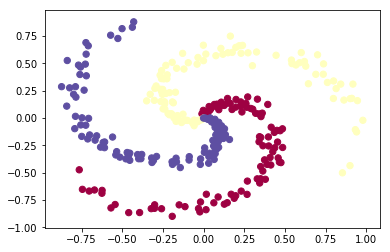

In [3]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [4]:
def L_i_vectorized(x, y, W):
    """
    A faster half-vectorized implementation. half-vectorized
    refers to the fact that for a single example the implementation contains
    no for loops, but there is still one loop over the examples (outside this function)
    """
    delta = 0.01
    scores = W.dot(x)
    # compute the margins for all classes in one vector operation
    margins = np.maximum(0, scores - scores[y] + delta)
    # on y-th position scores[y] - scores[y] canceled and gave delta. We want
    # to ignore the y-th position and only consider margin on max wrong class
    margins[y] = 0
    loss_i = np.sum(margins)
    return loss_i

def L(X, y, W):
    """
    fully-vectorized implementation :
    - X holds all the training examples as columns (e.g. 3073 x 50,000 in CIFAR-10)
    - y is array of integers specifying correct class (e.g. 50,000-D array)
    - W are weights (e.g. 10 x 3073)
    """
    
    loss = np.zeros(X.shape)
    
    for i in range(len(loss)):
        loss_i = L_i_vectorized(X[i], y[i], W)
        loss[i] = loss_i
        
    return np.sum(loss)

def predict(X, y, W_final):
    num_test = X.shape[0]
    # lets make sure that the output type matches the input type
    Ypred = np.zeros(num_test)

    # loop over all test rows
    for i in range(num_test):
        scores = W_final.dot(X[i])
        max_index = np.argmax(scores)
        Ypred[i] = max_index

    print('accuracy: %f' % ( np.mean(Ypred == y) ))
    
def eval_numerical_gradient(f, x):
    """ 
    a naive implementation of numerical gradient of f at x 
    - f should be a function that takes a single argument
    - x is the point (numpy array) to evaluate the gradient at
    """ 

    fx = f(x) # evaluate function value at original point
    grad = np.zeros(x.shape)
    h = 0.000000001

    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        old_value = x[ix]
        x[ix] = old_value + h # increment by h
        fxh = f(x) # evalute f(x + h)
        x[ix] = old_value # restore to previous value (very important!)

        # compute the partial derivative
        grad[ix] = (fxh - fx) / h # the slope
        it.iternext() # step to next dimension

    return grad

In [5]:
# W = 0.01 * np.random.randn(D,K)
# b = np.zeros((1,K))
# print(W.dot(X[1]))

# print(L(X,y,W))
# predict(X, y, W)

In [6]:
b = np.ones((X.shape[0],X.shape[1]+1))
b[:,:-1] = X
X = b

In [7]:
weights = 0.0001 * np.random.randn(K, X.shape[1])
print(weights.shape)
print(X.T.shape)
print(weights.dot(X[6]))

(3, 3)
(3, 300)
[  1.07927602e-04   7.66547871e-05  -9.53930648e-05]


In [8]:
print(L(X, y, weights))

18.0135886787


In [10]:
def loss_fun(W):    
    return L(X,y,W)


step_size = 10 ** -7
for i in range(3000): 
    df = eval_numerical_gradient(loss_fun, weights)     
    weights += - step_size * df
    
    if i % 100 == 0:
        print(df)
        print(time.strftime('%X'), i)
        #print('gradient', i)
        #print(weights)
        predict(X, y, weights)

[[ -5.5888183    7.85306575   0.        ]
 [ -3.04032888 -18.14037454  -2.99999847]
 [  8.6291454   10.28730701   3.00000025]]
14:18:04 0
accuracy: 0.553333
[[ -7.65941799   6.65158062  -3.00000025]
 [ -0.70600237 -15.88033882  -3.00000025]
 [  8.36541503   9.22875643   5.99999872]]
14:18:08 100
accuracy: 0.556667
[[ -7.65941444   6.6515824   -2.99999847]
 [ -0.70599881 -15.88033527  -2.99999847]
 [  8.36541858   9.2287582    6.00000227]]
14:18:11 200
accuracy: 0.556667
[[ -7.14062409   5.94227068  -6.0000005 ]
 [ -3.84405752 -14.30865382   2.99999847]
 [ 10.98467806   8.36638314   3.00000025]]
14:18:15 300
accuracy: 0.556667
[[ -5.0700244    7.14375581  -3.00000025]
 [ -3.87417387 -14.84192325   0.        ]
 [  8.94419472   7.69816921   3.00000025]]
14:18:18 400
accuracy: 0.553333


KeyboardInterrupt: 

In [11]:
predict(X, y, weights)

accuracy: 0.553333


In [12]:
print(weights)
# [[ -3.13882894e-05  -7.31184970e-03   5.36540381e-05]
# [ -1.03097749e-04   7.36096812e-03  -1.03900273e-04]]


[[ 0.0113834  -0.01444814 -0.00014893]
 [ 0.00480101  0.0201824   0.0005251 ]
 [-0.01615927 -0.00585653 -0.00028137]]


In [11]:
import numpy as np
N = 2
a = np.random.rand(N,N)
b = np.ones((N,N+1))
b[:,:-1] = a

In [12]:
print(b)

[[ 0.06111067  0.71109054  1.        ]
 [ 0.67395513  0.53143184  1.        ]]
